# SORDA - Sprectral Ocean Reflectance Data Assimilation

# Summary Diagnostics Plotting Notebook
### *Satellite Ocean Reflectance Data Assimilation – NECCTON WP4 Demonstration*

This notebook provides a **lightweight**, **fast**, and **self-contained** way to
visualise the performance of the SORDA assimilation system using **pre-computed summary files**.
It is designed for users who want to inspect the behaviour of the assimilation
(Ensemble Kalman Filter (OAK-based) of SORDA system) *without* running the full data-assimilation pipeline.

---

## 📌 What this notebook does

Using pre-computed NetCDF summaries stored in the `demo_summaries/` directory, this notebook can:

- **Hovmöller diagrams**
  - Forecast vs Analysis Mean Absolute Error (MAE)

- **Time series plots**
  - Domain-mean MAE over time
  - Domain-mean CRPS over time (forecast vs analysis)

- **Vertical profiles**
  - Depth-mean MAE improvement due to assimilation

- **Spatial increments**
  - Maps or sections showing how analysis differs from forecast

These diagnostics allow rapid interpretation of assimilation performance.

---

## 📂 Required Input Files

This notebook expects the summary files generated by running the main pipeline (WP4_demo_SORDA.ipynb) and stored in 

## Required python tools

In [1]:
#  %pip install -q numpy xarray netCDF4 matplotlib

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
# Point Python to your repo's src/python directory
import sys, pathlib
repo_root = pathlib.Path().resolve()          # or pathlib.Path("/path/to/SORDA")
print(repo_root)
sys.path.append(str(repo_root / "src" / "python"))
SUMMARY_DIR = repo_root / "demo_summaries"
RAWDAT_DIR = repo_root / "SORDA_output"

# (optional) autoreload so edits take effect without restarting the kernel
%load_ext autoreload
%autoreload 2

from summaries import (
    plot_mae_hovmoller_from_summary,
    plot_mae_global_from_summary,
    plot_mae_depth_profile_from_summary,
    plot_crps_from_summary,
)

from plotting import (
    plot_increments_map
)

/scratch/users/p/v/pverezem/SORDA


### Choose one of: 
- **CDI** - diatoms carbon concentration ($mmol/m^3$)

- **CEM** - emiliana / small falgellates carbon concentration ($mmol/m^3$)

- **CFL** - flagellates carbon concentration ($mmol/m^3$)

- **POC** - particulate organic carbon ($mmol/m^3$)

- **MES** - mesozooplankton concentration ($mmol/m^3$)

- **MIC** - microzooplankton concentration ($mmol/m^3$)

- **GEL** - gelatinious zooplankton ($mmol/m^3$)

In [6]:
var = "CFL"

# Optional custom colormap text file (placed in src/python repo)
cmap_txt = "./src/python/WhiteBlueGreenYellowRed.txt"  # or None

### MAE plots

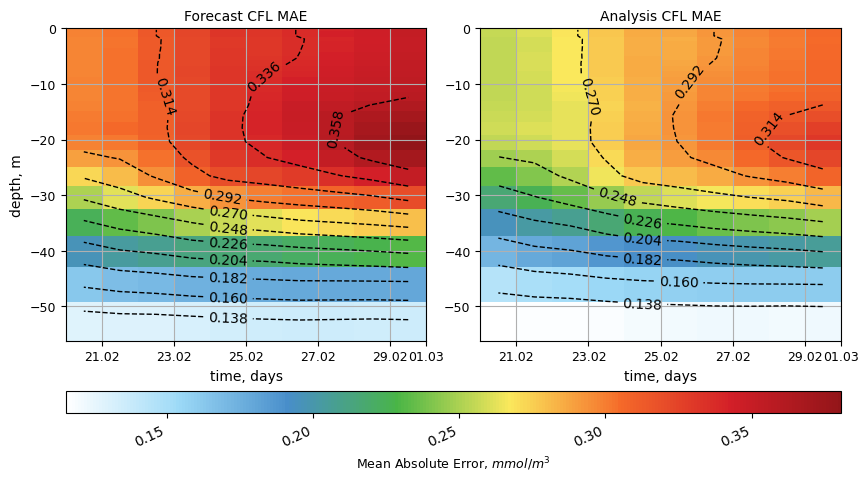

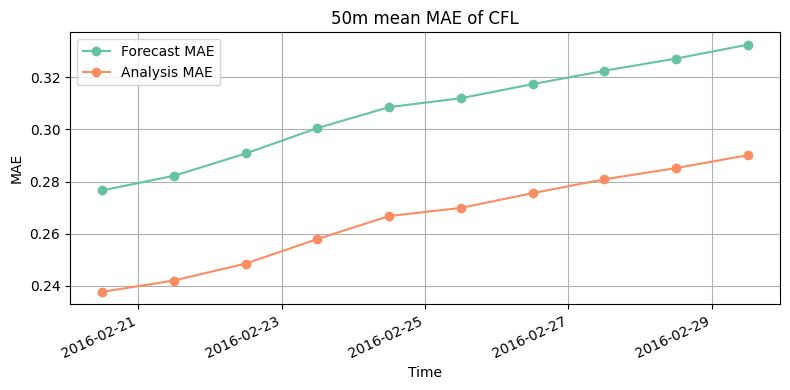

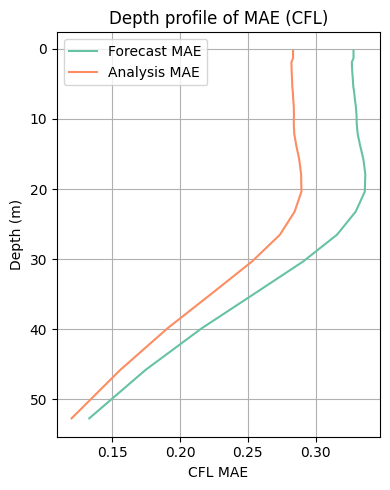

In [7]:
# Hovmöller MAE (forecast vs analysis)
plot_mae_hovmoller_from_summary(
    summary_file=SUMMARY_DIR / f"{var}_mae_summary.nc", 
    var=var, 
    cmap_txt=cmap_txt,
    output=f"{var}_mae_hovmoller_summary.png")

# Global MAE time series
plot_mae_global_from_summary(
    summary_file = SUMMARY_DIR / f"{var}_mae_summary.nc", 
    var=var,
    output=f"mae_ts_{var}.png"
)

# Depth profile of MAE (time-mean)
plot_mae_depth_profile_from_summary(
    summary_file= SUMMARY_DIR / f"{var}_mae_summary.nc",
    var=var,
    output=f"mae_profile_{var}.png"
)

### CRPS plot

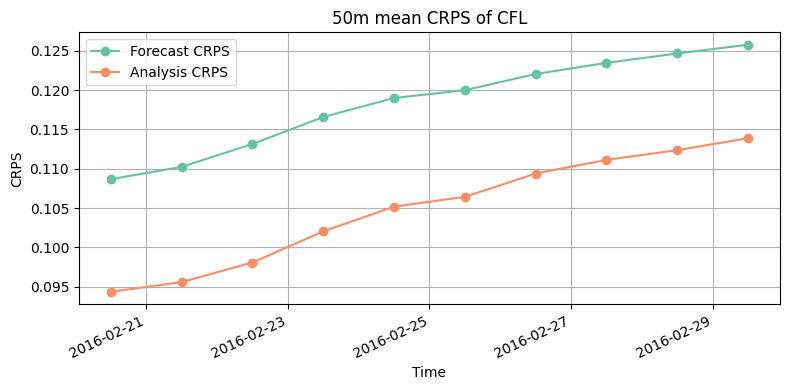

In [8]:
plot_crps_from_summary(
    SUMMARY_DIR / f"{var}_crps_summary.nc",
    var,
    output=f"crps_ts_{var}.png"
)

### Increment map can be plot at different depths and dates

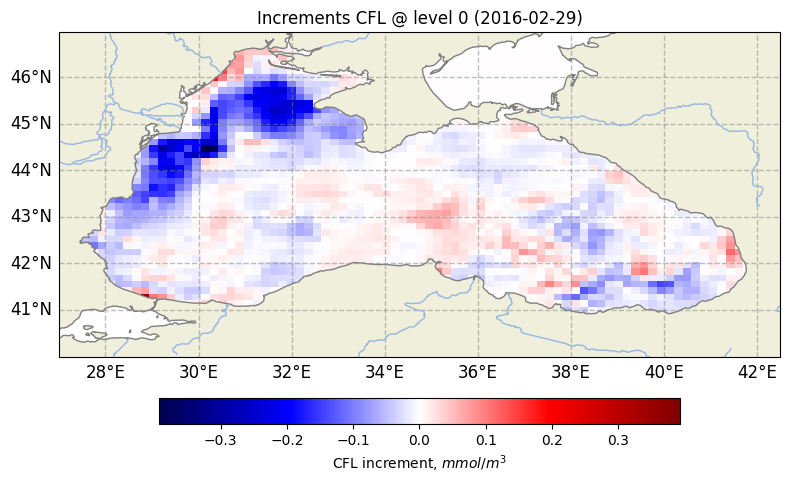

In [11]:
plot_increments_map(
    SUMMARY_DIR / "increments_combined.nc", 
    var, 
    depth=0, 
    date_index=-1
)